In [ ]:
from skimage import io,data
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
file1 = open("11.txt")
# 按行读取
contents = file1.readlines()
 
# 数组
arr1 = []
 
for item in contents:
    # 清除换行、空格
    content = item.strip()
    # 按照","分割
    temp = content.split(",")
    arr1.append(temp)
print(arr1)

In [ ]:
file2 = open("22.txt")
# 按行读取
contents = file2.readlines()
 
# 数组
arr2 = []
 
for item in contents:
    # 清除换行、空格
    content = item.strip()
    # 按照","分割
    temp = content.split(",")
    arr2.append(temp)
print(arr2)

In [ ]:
height1=int(arr1[0][0])#小
height2=int(arr1[0][2])#大

width1=int(arr1[0][1])#小
width2=int(arr1[0][5])#大
print(height1,height2)
print(width1,width2)

In [ ]:
#共有100行
print (len(arr2)) 

In [ ]:
#遍历第一张图中每个bounding box的左上角点的坐标记为X
#以X为中心，做一个边长为42像素的正方形REC
#在第二张图中判断是否存在左上角Y在REC范围内的bounding box
temp=21#像素值

for i in range(100):#遍历第一张图中的bounding box
    count=0#计数
    for j in range(len(arr2)):#遍历第二张图中的bounding box
    #最大像素偏移量为10
    #对bounding box的某一点10*10像素的区域内找相同位置的点
        if(int(arr2[j][0])-temp)<int(arr1[i][0])<(int(arr2[j][0])+temp)and(int(arr2[j][1])-temp)<int(arr1[i][1])<(int(arr2[j][1])+temp):
            count=count+1
    print(count)

In [ ]:
#for i in range(10):#最大像素偏移量为10
for j in range(100):#在第二个txt文件里依次检索满足上一条件
    if (int(arr2[j][0])-10) < int(arr1[0][0]) <（int(arr2[j][0])+10):
        
        if (int(arr2[j][1])-10)<int(arr1[0][1])<（int(arr2[j][1])+10):
            print(j)
             
    

In [ ]:
1<=2<=3

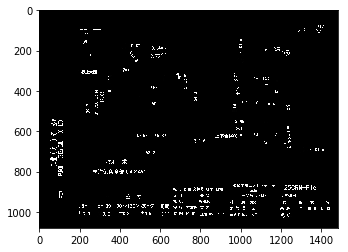

In [18]:
img=cv2.imread("result//22.jpg")
plt.imshow(img)

In [19]:
'''
for i in range(20):
    height1=int(arr[i][0])#小
    height2=int(arr[i][2])#大
    width1=int(arr[i][1])#小
    width2=int(arr[i][5])#大
    #print(height1,height2)
    cv2.rectangle(img,(height1,width2),(height2,width1),(0,255,0),3)
    cv2.imwrite("result\\%d.jpg"%(i),img)
    #print("你好%d"%(a))
    #cv2.resizeWindow("enhanced", 640, 480);
#cv2.imshow("Image",img)
plt.imshow(img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
'''

'\nfor i in range(20):\n    height1=int(arr[i][0])#小\n    height2=int(arr[i][2])#大\n    width1=int(arr[i][1])#小\n    width2=int(arr[i][5])#大\n    #print(height1,height2)\n    cv2.rectangle(img,(height1,width2),(height2,width1),(0,255,0),3)\n    cv2.imwrite("result\\%d.jpg"%(i),img)\n    #print("你好%d"%(a))\n    #cv2.resizeWindow("enhanced", 640, 480);\n#cv2.imshow("Image",img)\nplt.imshow(img)\n#cv2.waitKey(0)\n#cv2.destroyAllWindows()\n'

D:\Python3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
D:\Python3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


(1080, 1484, 3)

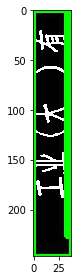

In [21]:

img=cv2.imread("result\\11.jpg")
roi=img[width1:width2,height1:height2,:]
#roi=img[80:180,100:200,:]
io.imshow(roi)
a=1
img.shape